In [1]:
from __future__ import print_function
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.utils import np_utils

import matplotlib.pyplot as plt

np.random.seed(1671)  # for reproducibility

Using TensorFlow backend.


In [2]:
# network and training
NB_EPOCH = 250
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10   # number of outputs = number of digits
OPTIMIZER = SGD() # optimizer, explained later in this chapter
N_HIDDEN = 128
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION
DROPOUT = 0.3

In [3]:
# data: shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
#X_train is 60000 rows of 28x28 values --> reshaped in 60000 x 784
RESHAPED = 784
#
X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [5]:
# normalize 
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [6]:
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)

In [7]:
# M_HIDDEN hidden layers
# 10 outputs
# final stage is softmax

model = Sequential()
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
__________

In [8]:
model.compile(loss='categorical_crossentropy',
              optimizer=OPTIMIZER,
              metrics=['accuracy'])

In [9]:
history = model.fit(X_train, Y_train,
                    batch_size=BATCH_SIZE, epochs=NB_EPOCH,
                    verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Train on 48000 samples, validate on 12000 samples
Epoch 1/250
48000/48000 [==============================] - 2s - loss: 1.7403 - acc: 0.4538 - val_loss: 0.9289 - val_acc: 0.8126
Epoch 2/250
48000/48000 [==============================] - 2s - loss: 0.9230 - acc: 0.7229 - val_loss: 0.5401 - val_acc: 0.8652
Epoch 3/250
48000/48000 [==============================] - 2s - loss: 0.6934 - acc: 0.7881 - val_loss: 0.4297 - val_acc: 0.8884
Epoch 4/250
48000/48000 [==============================] - 2s - loss: 0.5947 - acc: 0.8208 - val_loss: 0.3789 - val_acc: 0.8977
Epoch 5/250
48000/48000 [==============================] - 2s - loss: 0.5346 - acc: 0.8395 - val_loss: 0.3455 - val_acc: 0.9040
Epoch 6/250
48000/48000 [==============================] - 2s - loss: 0.4976 - acc: 0.8523 - val_loss: 0.3232 - val_acc: 0.9106
Epoch 7/250
48000/48000 [==============================] - 2s - loss: 0.4616 - acc: 0.8629 - val_loss: 0.3048 - val_acc: 0.9128
Epoch 8/250
48000/48000 [=============================

48000/48000 [==============================] - 2s - loss: 0.1565 - acc: 0.9529 - val_loss: 0.1126 - val_acc: 0.9665
Epoch 65/250
48000/48000 [==============================] - 2s - loss: 0.1561 - acc: 0.9541 - val_loss: 0.1128 - val_acc: 0.9667
Epoch 66/250
48000/48000 [==============================] - 2s - loss: 0.1573 - acc: 0.9533 - val_loss: 0.1120 - val_acc: 0.9664
Epoch 67/250
48000/48000 [==============================] - 2s - loss: 0.1554 - acc: 0.9546 - val_loss: 0.1106 - val_acc: 0.9668
Epoch 68/250
48000/48000 [==============================] - 2s - loss: 0.1526 - acc: 0.9544 - val_loss: 0.1103 - val_acc: 0.9672
Epoch 69/250
48000/48000 [==============================] - 2s - loss: 0.1524 - acc: 0.9552 - val_loss: 0.1089 - val_acc: 0.9676
Epoch 70/250
48000/48000 [==============================] - 2s - loss: 0.1503 - acc: 0.9551 - val_loss: 0.1086 - val_acc: 0.9677
Epoch 71/250
48000/48000 [==============================] - 2s - loss: 0.1479 - acc: 0.9566 - val_loss: 0.1082

48000/48000 [==============================] - 3s - loss: 0.1034 - acc: 0.9685 - val_loss: 0.0889 - val_acc: 0.9747
Epoch 128/250
48000/48000 [==============================] - 3s - loss: 0.1043 - acc: 0.9685 - val_loss: 0.0884 - val_acc: 0.9752
Epoch 129/250
48000/48000 [==============================] - 3s - loss: 0.1051 - acc: 0.9676 - val_loss: 0.0883 - val_acc: 0.9752
Epoch 130/250
48000/48000 [==============================] - 3s - loss: 0.1039 - acc: 0.9689 - val_loss: 0.0883 - val_acc: 0.9753
Epoch 131/250
48000/48000 [==============================] - 3s - loss: 0.1025 - acc: 0.9690 - val_loss: 0.0876 - val_acc: 0.9751
Epoch 132/250
48000/48000 [==============================] - 4s - loss: 0.0999 - acc: 0.9702 - val_loss: 0.0879 - val_acc: 0.9752
Epoch 133/250
48000/48000 [==============================] - 4s - loss: 0.1009 - acc: 0.9686 - val_loss: 0.0877 - val_acc: 0.9753
Epoch 134/250
48000/48000 [==============================] - 4s - loss: 0.0989 - acc: 0.9688 - val_loss:

48000/48000 [==============================] - 2s - loss: 0.0776 - acc: 0.9760 - val_loss: 0.0822 - val_acc: 0.9766
Epoch 191/250
48000/48000 [==============================] - 2s - loss: 0.0780 - acc: 0.9766 - val_loss: 0.0822 - val_acc: 0.9765
Epoch 192/250
48000/48000 [==============================] - 2s - loss: 0.0798 - acc: 0.9758 - val_loss: 0.0821 - val_acc: 0.9772
Epoch 193/250
48000/48000 [==============================] - 2s - loss: 0.0775 - acc: 0.9760 - val_loss: 0.0818 - val_acc: 0.9769
Epoch 194/250
48000/48000 [==============================] - 2s - loss: 0.0781 - acc: 0.9760 - val_loss: 0.0818 - val_acc: 0.9769
Epoch 195/250
48000/48000 [==============================] - 2s - loss: 0.0768 - acc: 0.9764 - val_loss: 0.0820 - val_acc: 0.9766
Epoch 196/250
48000/48000 [==============================] - 2s - loss: 0.0742 - acc: 0.9773 - val_loss: 0.0818 - val_acc: 0.9767
Epoch 197/250
48000/48000 [==============================] - 2s - loss: 0.0770 - acc: 0.9758 - val_loss:

In [13]:
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

 9600/10000 [===========================>..] - ETA: 0s
Test score: 0.0774548015581
Test accuracy: 0.978


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


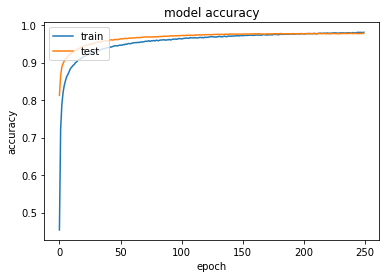

In [14]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

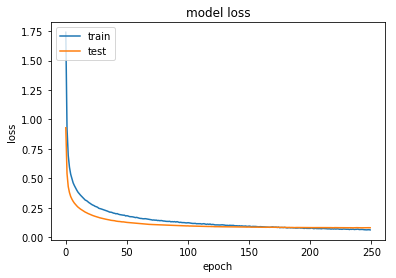

In [15]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()